In [297]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn

In [298]:
rn.seed(7)

### Implement the following models in the language of your preference:

#### (a) Random graph

In [314]:
def random_graph(n, p):
    """Returns a random graph according to the Erdos Renyi Model.
    Create an empty graph, add fixed n nodes to it and add edges 
    to the graph randomly according to fixed probability p.
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    p : int
        The value of probablity
  
    Returns 
    -------
    G : Graph 

    """
    
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)]) 
    
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = rn.random()
                
                if r <= p:
                    G.add_edge(i, j)
                else:
                    continue
    return G

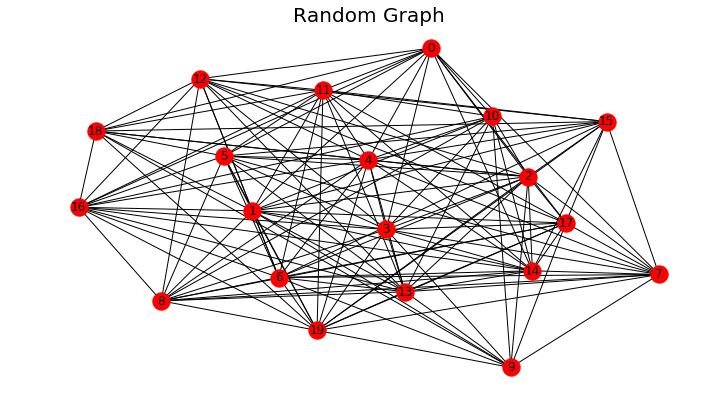

In [315]:
G = random_graph(20,0.5)
plt.figure(figsize = (9,5))
nx.draw(G, with_labels = True)
plt.title('Random Graph', fontsize = 20)
plt.show()

#### (b) Watts-Strogatz model

In [310]:
def watts_strogatz_graph(n, p, k):
    """Returns a random graph according to the Watts Strogatz Model.
    Model starts with a regular graph and rewires its edges randomly 
    to produce graphs with small-world properties.
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    p : int
        The value of probablity
    k : int
        An even integer, number of nearest neightbours of each node in regular graph. 
  
    Returns 
    -------
    G : Graph 

    """
    
    k = k + 1
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)])       
    
    for i in G.nodes:
        for j in G.nodes:
            if (0 < abs(i - j) % (n - k / 2)) and (abs(i - j) % (n - k / 2) <= k / 2):
                 G.add_edge(i, j)
    
    for n in G.nodes:
        for l in list(G.neighbors(n)):
            r = rn.random()
            if r > p:
                list_of_nodes = list(G.nodes())
                list_of_nodes.remove(n)
                for d in list(G.neighbors(n)):
                    list_of_nodes.remove(d)
                        
                m = rn.choice(list_of_nodes)
                G.remove_edge(n, l)
                G.add_edge(n, m)
    return G

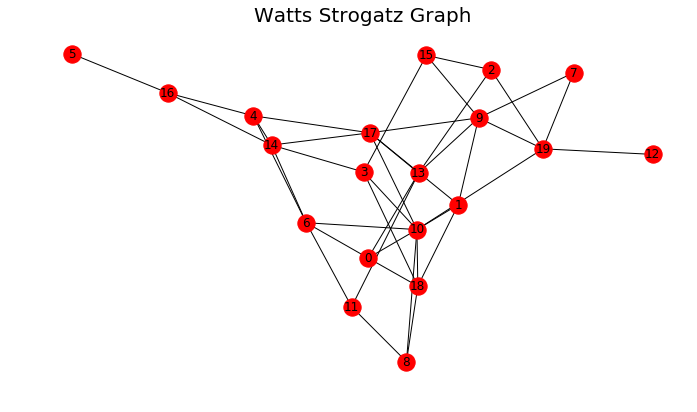

In [311]:
G = watts_strogatz_graph(20, 0.15, 4)
plt.figure(figsize = (9,5))
nx.draw(G, with_labels = True)
plt.title('Watts Strogatz Graph', fontsize = 20)
plt.show()

#### (c) Barabasi-Albert model

In [312]:
def barabasi_albert_graph(n, m, m0):
    """Returns a random graph according to the Barabasi Albert Model.
    A graph of n nodes is grown by attaching new nodes each with m edges 
    that are preferentially attached to existing nodes with high degree. 
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    m0 : int
        The number of staring m0 nodes, m0 > m
  
    Returns 
    -------
    G : Graph 

    """

    G = nx.complete_graph(m0)
    
    for i in range(m0 + 1, n+1):
        deg = nx.degree(G) 
        num_edges_added = 0
        target_nodes = []
        
        while(num_edges_added <= m):
            p = rn.random()
            j = rn.choice(list(G.nodes()))
            if j not in target_nodes:
        
                if p <= G.degree(j)/sum(dict(deg).values()):
                    G.add_edge(i, j)
                    num_edges_added += 1
                
            else: 
                continue
            
        G.add_node(i)
                 
    return G

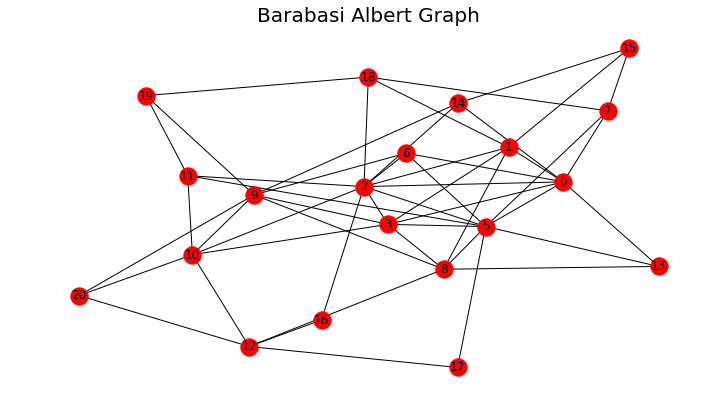

In [313]:
G = barabasi_albert_graph(20,2,4)
plt.figure(figsize = (9,5))
nx.draw(G, with_labels = True)
plt.title('Barabasi Albert Graph', fontsize = 20)
plt.show()